### DBSCAN mit epsilon = 1 und Maschine 1

=== STARTING ANALYSIS ===

1. Daten werden eingelesen...
   Parsing data string...
   Anzahl gelesener Zeilen: 877209
   Spalten: ['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration', 'errorID', 'failure', 'comp', 'model', 'age', 'volt_rotate', 'pressure_vibration']

Ausreißer-Statistiken:
Anzahl Ausreißer: 45

Ausreißer-Zeitpunkte und Werte:

Zeitpunkt: 2015-01-12 17:00:00
volt: 0.08
rotate: -0.72
pressure: -3.81
vibration: 0.41

Zeitpunkt: 2015-01-17 07:00:00
volt: 4.33
rotate: 0.87
pressure: -0.51
vibration: 0.73

Zeitpunkt: 2015-01-26 17:00:00
volt: 2.64
rotate: 0.74
pressure: 0.40
vibration: -2.48

Zeitpunkt: 2015-01-29 21:00:00
volt: -2.86
rotate: 1.22
pressure: -1.38
vibration: 1.71

Zeitpunkt: 2015-02-20 22:00:00
volt: -2.82
rotate: -2.05
pressure: 0.82
vibration: -2.68

Zeitpunkt: 2015-03-07 05:00:00
volt: -3.07
rotate: 0.72
pressure: 1.85
vibration: 1.26

Zeitpunkt: 2015-03-09 00:00:00
volt: -0.20
rotate: 1.21
pressure: -1.75
vibration: -3.22

Zeitpunkt: 2015-0

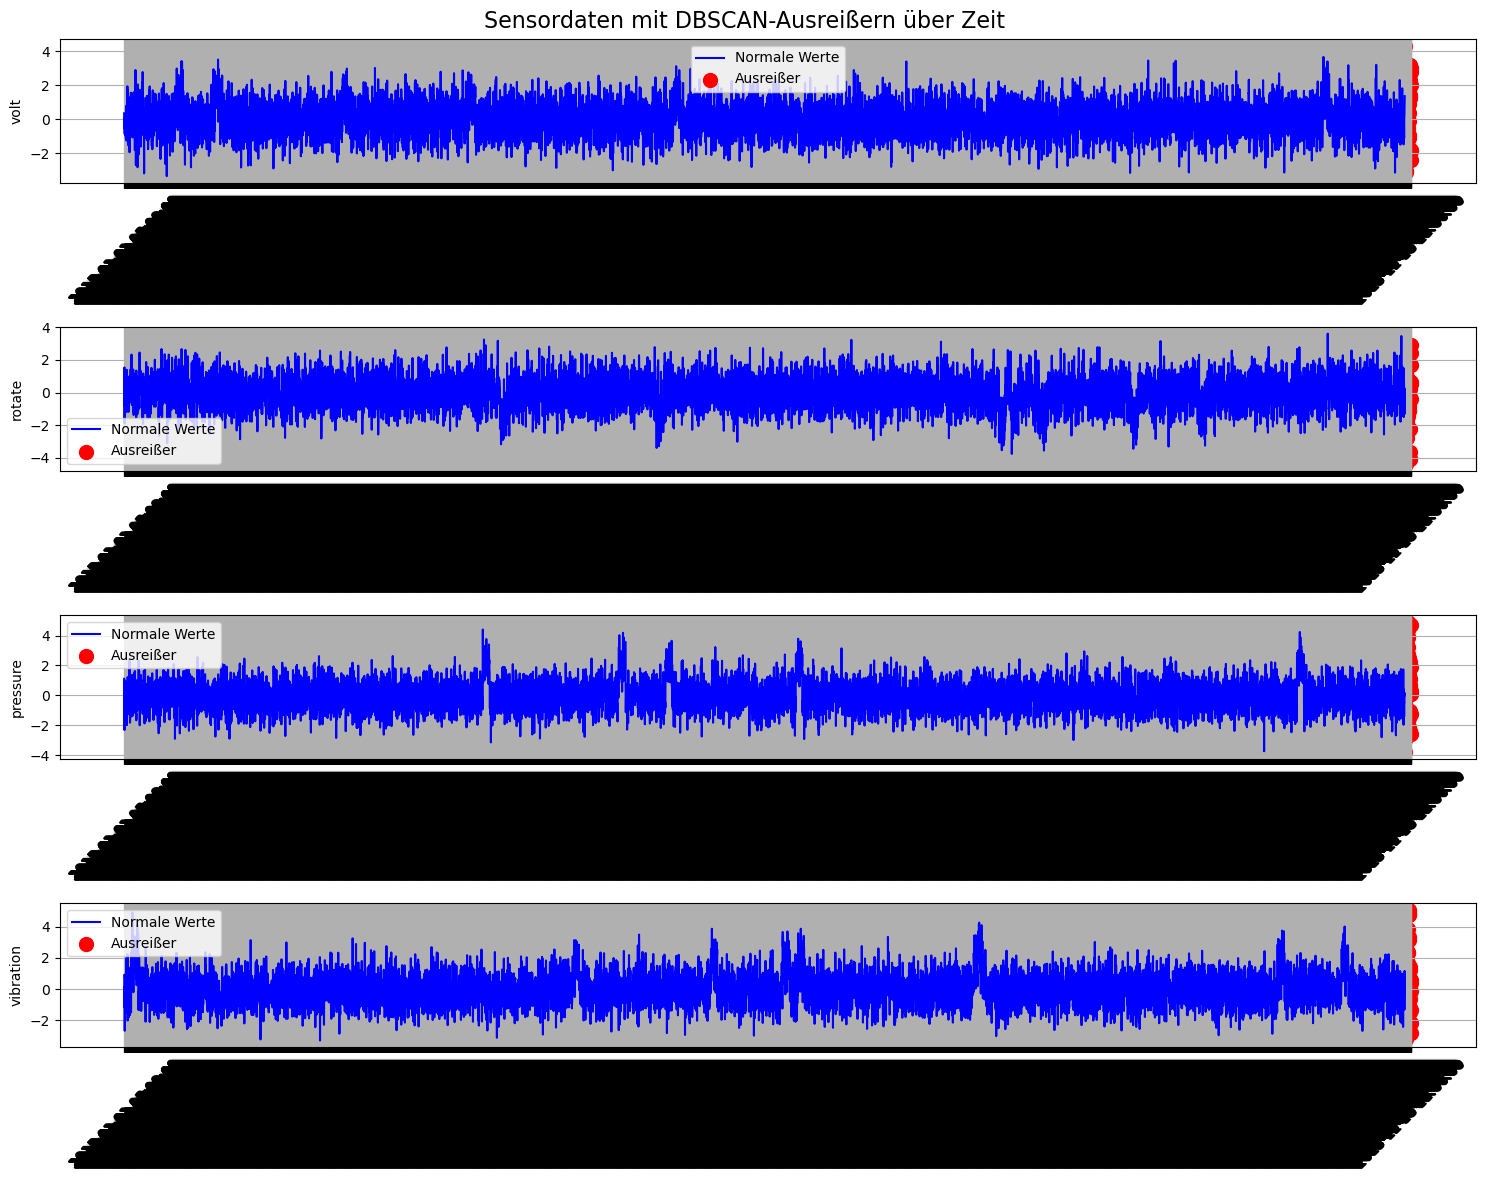

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt
from datetime import datetime
from io import StringIO

print("=== STARTING ANALYSIS ===")

# Daten einlesen
print("\n1. Daten werden eingelesen...")
def parse_data(data_string):
    print("   Parsing data string...")
    df = pd.read_pickle(data_string)
    print(f"   Anzahl gelesener Zeilen: {len(df)}")
    print(f"   Spalten: {df.columns.tolist()}")
    return df


# Read pickle file
#df_test = pd.read_pickle("../data/PdM_merged_preprocessed.pkl")
df = parse_data(data_string = "../data/PdM_merged_preprocessed.pkl")

df = df[df['machineID'] == 1]
features = ['volt', 'rotate', 'pressure', 'vibration']
X = df[features]

# Daten standardisieren
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# DBSCAN für Ausreißererkennung
dbscan = DBSCAN(eps=1, min_samples=2)
dbscan_labels = dbscan.fit_predict(X)

# Ausreißer identifizieren (Label -1)
outliers = df[dbscan_labels == -1]
normal_points = df[dbscan_labels != -1]

# Erstelle mehrere Subplots für jeden Sensor
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Sensordaten mit DBSCAN-Ausreißern über Zeit', fontsize=16)

for idx, feature in enumerate(features):
    # Plot normale Punkte
    axes[idx].plot(normal_points['datetime'], normal_points[feature], 'b-', label='Normale Werte')
    
    # Plot Ausreißer als rote Punkte
    if len(outliers) > 0:
        axes[idx].scatter(outliers['datetime'], outliers[feature], color='red', marker='o', 
                         s=100, label='Ausreißer')
    
    # Formatierung
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True)
    axes[idx].legend()
    
    # Rotiere x-Achsen Labels für bessere Lesbarkeit
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)

# Enge Layout-Anpassung
plt.tight_layout()

# Statistiken ausgeben
print("\nAusreißer-Statistiken:")
print(f"Anzahl Ausreißer: {len(outliers)}")
if len(outliers) > 0:
    print("\nAusreißer-Zeitpunkte und Werte:")
    for _, row in outliers.iterrows():
        print(f"\nZeitpunkt: {row['datetime']}")
        for feature in features:
            print(f"{feature}: {row[feature]:.2f}")

print("\nStatistische Zusammenfassung der Ausreißer:")
if len(outliers) > 0:
    print(outliers[features].describe())
else:
    print("Keine Ausreißer gefunden")

# Anzahl an Ausreißern
print("\nAnzahl Ausreißer pro Sensor:")
print(outliers[features].count())

### K-Means mit 1%-Ausreißer-Identifikation von Maschine 1

=== STARTING ANALYSIS WITH K-MEANS ===

1. Daten werden eingelesen...
   Parsing data string...
   Anzahl gelesener Zeilen: 877209
   Spalten: ['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration', 'errorID', 'failure', 'comp', 'model', 'age']


/home/EnzoZ/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Ausreißer-Statistiken:
Anzahl Ausreißer: 88

Ausreißer-Zeitpunkte und Werte:

Zeitpunkt: 2015-01-03 14:00:00
volt: 166.48
rotate: 487.42
pressure: 90.42
vibration: 66.76

Zeitpunkt: 2015-01-06 22:00:00
volt: 121.50
rotate: 428.69
pressure: 103.47
vibration: 45.86

Zeitpunkt: 2015-01-12 17:00:00
volt: 171.98
rotate: 408.40
pressure: 58.73
vibration: 42.58

Zeitpunkt: 2015-01-13 09:00:00
volt: 119.06
rotate: 477.62
pressure: 104.95
vibration: 37.00

Zeitpunkt: 2015-01-17 07:00:00
volt: 237.94
rotate: 492.16
pressure: 95.20
vibration: 44.30

Zeitpunkt: 2015-01-17 18:00:00
volt: 223.38
rotate: 382.07
pressure: 99.70
vibration: 49.85

Zeitpunkt: 2015-01-27 01:00:00
volt: 214.64
rotate: 547.24
pressure: 113.38
vibration: 40.64

Zeitpunkt: 2015-01-29 21:00:00
volt: 126.40
rotate: 510.72
pressure: 85.56
vibration: 49.57

Zeitpunkt: 2015-02-09 02:00:00
volt: 152.26
rotate: 461.77
pressure: 74.71
vibration: 23.03

Zeitpunkt: 2015-02-12 18:00:00
volt: 126.04
rotate: 402.38
pressure: 77.91
vibrat

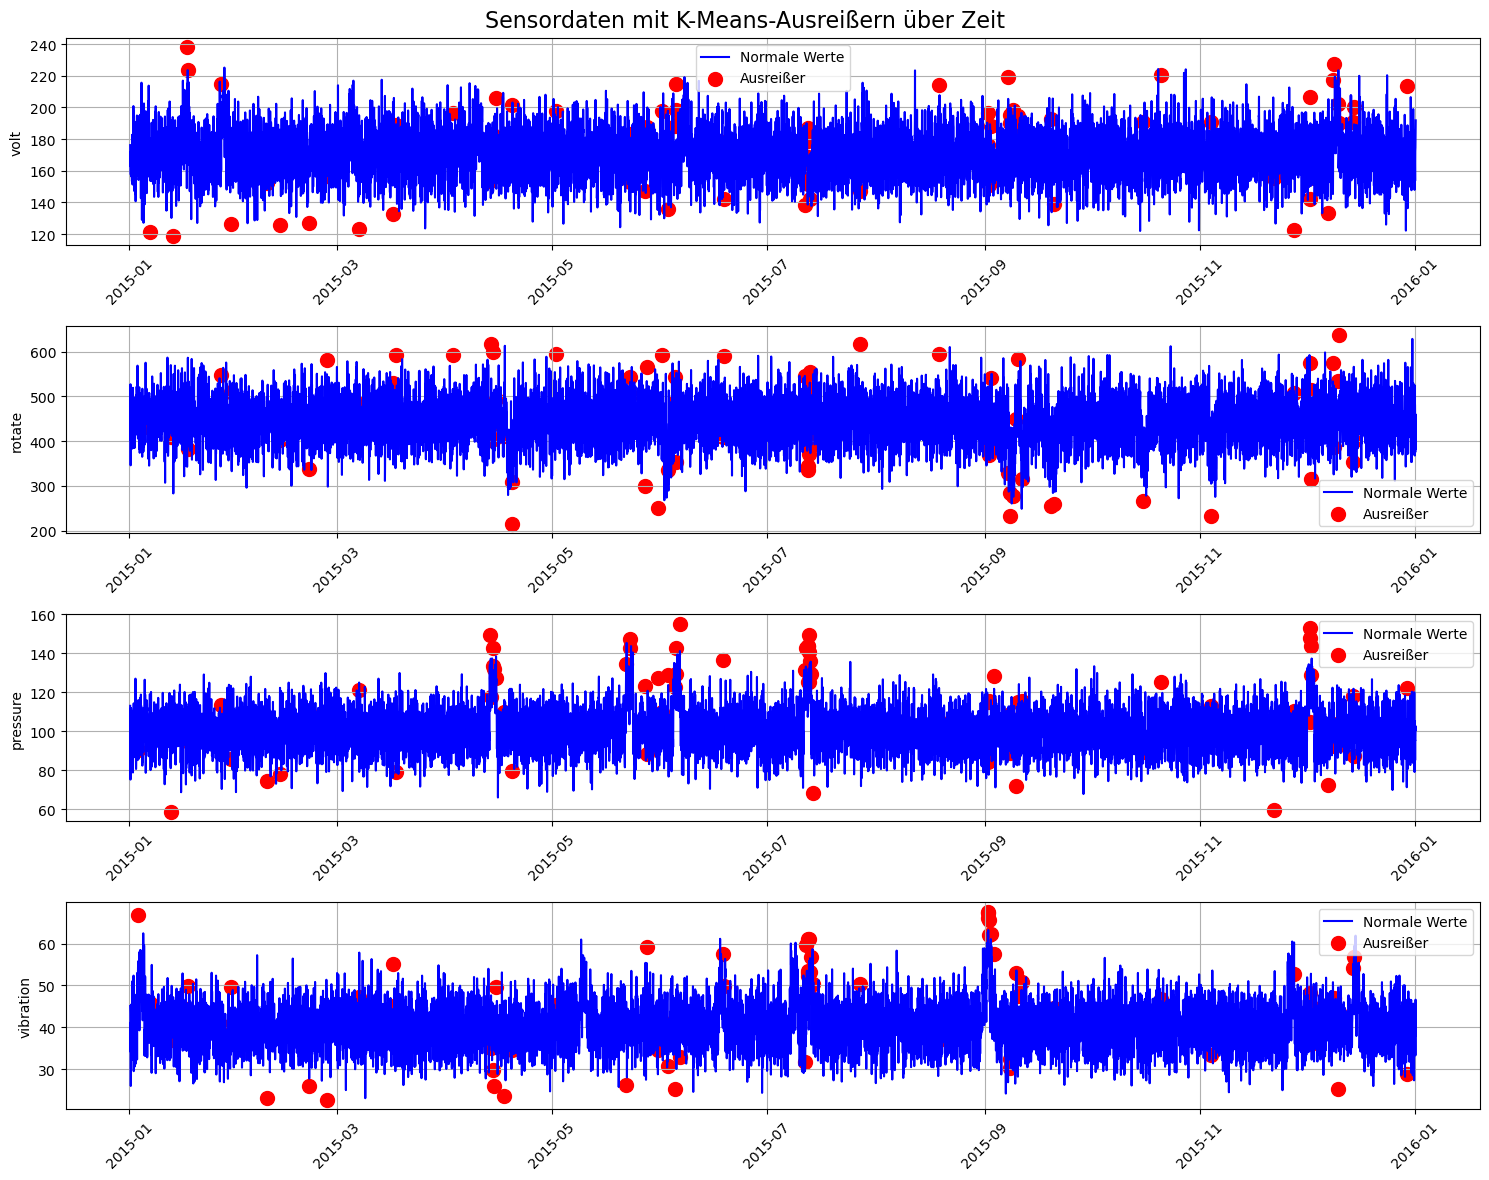

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

print("=== STARTING ANALYSIS WITH K-MEANS ===")

# Daten einlesen
print("\n1. Daten werden eingelesen...")
def parse_data(data_string):
    print("   Parsing data string...")
    df = pd.read_csv(data_string, parse_dates=['datetime'])
    print(f"   Anzahl gelesener Zeilen: {len(df)}")
    print(f"   Spalten: {df.columns.tolist()}")
    return df

df = parse_data(data_string="../data/PdM_merged.csv")

# Filter für Maschine 1
df = df[df['machineID'] == 1]
features = ['volt', 'rotate', 'pressure', 'vibration']
X = df[features]

# Daten standardisieren
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Cluster erstellen
n_clusters = 5 # Anzahl der Cluster, kann angepasst werden
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Cluster-Zentren berechnen
cluster_centers = kmeans.cluster_centers_

# Abstände zum nächstgelegenen Clusterzentrum berechnen
distances = np.min(np.linalg.norm(X_scaled[:, np.newaxis] - cluster_centers, axis=2), axis=1)

# Ausreißer-Definition: Punkte mit einem Abstand, der eine Schwelle überschreitet
threshold = np.percentile(distances, 99)  # z. B. die obersten 5% der Abstände
outliers = df[distances > threshold]
normal_points = df[distances <= threshold]

# Erstelle mehrere Subplots für jeden Sensor
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Sensordaten mit K-Means-Ausreißern über Zeit', fontsize=16)

for idx, feature in enumerate(features):
    # Plot normale Punkte
    axes[idx].plot(normal_points['datetime'], normal_points[feature], 'b-', label='Normale Werte')
    
    # Plot Ausreißer als rote Punkte
    if len(outliers) > 0:
        axes[idx].scatter(outliers['datetime'], outliers[feature], color='red', marker='o', 
                          s=100, label='Ausreißer')
    
    # Formatierung
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True)
    axes[idx].legend()
    
    # Rotiere x-Achsen Labels für bessere Lesbarkeit
    plt.setp(axes[idx].xaxis.get_majorticklabels(), rotation=45)

# Enge Layout-Anpassung
plt.tight_layout()

# Statistiken ausgeben
print("\nAusreißer-Statistiken:")
print(f"Anzahl Ausreißer: {len(outliers)}")
if len(outliers) > 0:
    print("\nAusreißer-Zeitpunkte und Werte:")
    for _, row in outliers.iterrows():
        print(f"\nZeitpunkt: {row['datetime']}")
        for feature in features:
            print(f"{feature}: {row[feature]:.2f}")

print("\nStatistische Zusammenfassung der Ausreißer:")
if len(outliers) > 0:
    print(outliers[features].describe())
else:
    print("Keine Ausreißer gefunden")

# Anzahl an Ausreißern
print("\nAnzahl Ausreißer pro Sensor:")
print(outliers[features].count())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Daten laden
data = pd.read_csv("machine_data.csv")  # Speichere die CSV-Daten in eine Datei

# 2. Filtern der normalen Daten (keine Fehler oder Ausfälle)
normal_data = data[(data["errorID"].isnull()) & (data["failure"].isnull()) & (data["comp"].isnull())]

# 3. Entfernen unnötiger Spalten
normal_data = normal_data.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)

# 4. Daten normalisieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normal_data)

# 5. Trainings- und Testdaten aufteilen
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# 6. Autoencoder-Modell definieren
input_dim = X_train.shape[1]
encoding_dim = 5  # Anzahl der Neuronen im versteckten Layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 7. Modell trainieren
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)

# 8. Rekonstruktionsfehler berechnen
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# 9. Schwellenwert festlegen (z.B. 95. Perzentil des Fehlers)
threshold = np.percentile(mse, 95)

# 10. Anomalien erkennen
anomalies = mse > threshold
print(f"Anomalien erkannt: {np.sum(anomalies)}")

# 11. Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, label="Rekonstruktionsfehler")
plt.axvline(threshold, color="red", linestyle="--", label="Schwellenwert")
plt.xlabel("Rekonstruktionsfehler")
plt.ylabel("Häufigkeit")
plt.legend()
plt.title("Anomalieerkennung mit Autoencoder")
plt.show()
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Daten laden
data = pd.read_csv("machine_data.csv")  # Speichere die CSV-Daten in eine Datei

# 2. Filtern der normalen Daten (keine Fehler oder Ausfälle)
normal_data = data[(data["errorID"].isnull()) & (data["failure"].isnull()) & (data["comp"].isnull())]

# 3. Entfernen unnötiger Spalten
normal_data = normal_data.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)

# 4. Daten normalisieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normal_data)

# 5. Trainings- und Testdaten aufteilen
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# 6. Autoencoder-Modell definieren
input_dim = X_train.shape[1]
encoding_dim = 5  # Anzahl der Neuronen im versteckten Layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 7. Modell trainieren
history = autoencoder.fit(X_train, X_train, 
                          epochs=50, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)

# 8. Rekonstruktionsfehler berechnen
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# 9. Schwellenwert festlegen (z.B. 95. Perzentil des Fehlers)
threshold = np.percentile(mse, 95)

# 10. Anomalien erkennen
anomalies = mse > threshold
print(f"Anomalien erkannt: {np.sum(anomalies)}")

# 11. Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, label="Rekonstruktionsfehler")
plt.axvline(threshold, color="red", linestyle="--", label="Schwellenwert")
plt.xlabel("Rekonstruktionsfehler")
plt.ylabel("Häufigkeit")
plt.legend()
plt.title("Anomalieerkennung mit Autoencoder")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# 1. Daten laden
data = pd.read_csv("../data/PdM_merged.csv")  # Speichere die CSV-Daten in eine Datei

# 2. Filtern der normalen Daten (keine Fehler oder Ausfälle)
normal_data = data[(data["errorID"].isnull()) & (data["failure"].isnull()) & (data["comp"].isnull())]

# 3. Entfernen unnötiger Spalten
normal_data = normal_data.drop(["datetime", "machineID", "errorID", "failure", "comp", "model"], axis=1)



877209
870312


In [ ]:
# 4. Daten normalisieren
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(normal_data)

# 5. Trainings- und Testdaten aufteilen
X_train, X_test = train_test_split(data_scaled, test_size=0.2, random_state=42)

# 6. Autoencoder-Modell definieren
input_dim = X_train.shape[1]
encoding_dim = 5  # Anzahl der Neuronen im versteckten Layer

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation="relu")(input_layer)
decoded = Dense(input_dim, activation="sigmoid")(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer="adam", loss="mse")

# 7. Modell trainieren
history = autoencoder.fit(X_train, X_train, 
                          epochs=10, 
                          batch_size=32, 
                          validation_data=(X_test, X_test),
                          verbose=1)

# 8. Rekonstruktionsfehler berechnen
reconstructions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - reconstructions, 2), axis=1)

# 9. Schwellenwert festlegen (z.B. 95. Perzentil des Fehlers)
threshold = np.percentile(mse, 95)

# 10. Anomalien erkennen
anomalies = mse > threshold
print(f"Anomalien erkannt: {np.sum(anomalies)}")

# 11. Ergebnisse visualisieren
plt.figure(figsize=(10, 6))
plt.hist(mse, bins=50, alpha=0.7, label="Rekonstruktionsfehler")
plt.axvline(threshold, color="red", linestyle="--", label="Schwellenwert")
plt.xlabel("Rekonstruktionsfehler")
plt.ylabel("Häufigkeit")
plt.legend()
plt.title("Anomalieerkennung mit Autoencoder")
plt.show()


Epoch 1/50
21758/21758 [==============================] - 15s 699us/step - loss: 0.0043 - val_loss: 0.0031
Epoch 2/50
 2183/21758 [==>...........................] - ETA: 10s - loss: 0.0031

KeyboardInterrupt: 